## Observations and Insights 

* Boxplot and mean size of tumor shows that Ramicane and Capomulin are the most effective treatments overall.
* From the boxplot as well, we can say Ramicane is more stable as the median value is really centered within the box, which for drug treatment can be very important to have these kind of results.
* From the Scatter Plot, we can say that Capomulin treatment shows a positive correlation between the size of the tumor and the weight of the mouse, meaning that maybe the sample should be only small mice if anye.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,how="outer")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
len(combined_data["Mouse ID"])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = pd.DataFrame({"Mouse ID":combined_data["Mouse ID"],
                         "Timepoint":combined_data["Timepoint"]})
duplicate

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates("Mouse ID")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

249

## Summary Statistics


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary = summary.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Mean (mm3)"})
summary["Total Volume Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary["Total Volume Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary["Total Volume Standard deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary["Total Volume Standard error"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean (mm3),Total Volume Median,Total Volume Variance,Total Volume Standard deviation,Total Volume Standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary2 = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary2.describe()

,Tumor Volume (mm3)
count,10.000000
mean,50.976144
std,5.621333
min,40.216745
25%,52.389707
50%,53.060651
75%,54.183257
max,55.235638


## Bar Plots

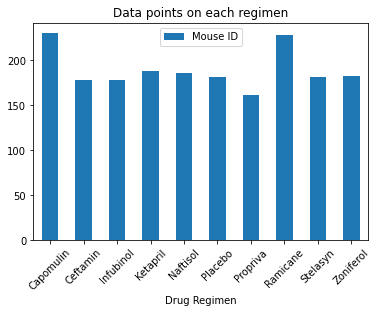

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
barplot_df = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"])
barplot_df.plot(kind="bar")
plt.title("Data points on each regimen")
plt.xticks(rotation=45)
plt.show()

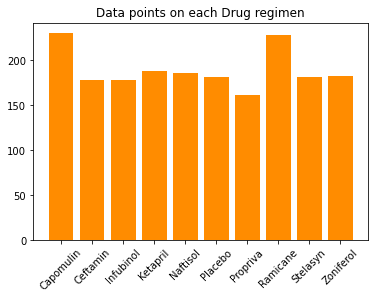

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(barplot_df.reset_index()["Drug Regimen"],barplot_df["Mouse ID"],color="DarkOrange")
plt.title("Data points on each Drug regimen")
plt.xticks(rotation=45)
plt.show()

## Pie Plots

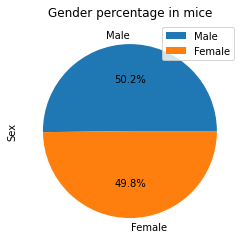

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame({"Sex":clean_data["Sex"].value_counts()})
gender_df.plot.pie(y="Sex",autopct="%1.1f%%")
plt.title("Gender percentage in mice")
plt.show()

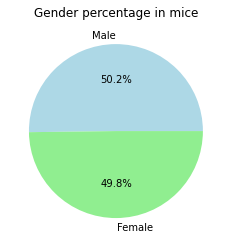

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(labels = gender_df.index.values, x = gender_df["Sex"], colors={"Lightgreen","Lightblue"}, autopct="%1.1f%%")
plt.title("Gender percentage in mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Sorting all drugs and getting the mean of tumor volume to know which ones are the most effective, saving it on list.
sorted_drugs = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]).sort_values(by="Tumor Volume (mm3)")
sorted_drugs


,Tumor Volume (mm3)
Drug Regimen,
Ramicane,40.216745
Capomulin,40.675741
Propriva,52.322552
Ceftamin,52.591172
Infubinol,52.884795
Zoniferol,53.236507
Placebo,54.033581
Stelasyn,54.233149
Naftisol,54.331565


In [14]:
promising_drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
timepoint_df = pd.DataFrame(combined_data.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"])
tumor_volumes = []
timepoint_df = timepoint_df.reset_index()
# Getting the list of lists for the volumes of each Drug Regimen
for drug in promising_drugs:
    tumor_volumes.append(timepoint_df.loc[timepoint_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"].tolist())

top4_df = pd.DataFrame({"Promising Drugs":promising_drugs,
                        "Tumor Volumes":tumor_volumes})
top4_df.set_index("Promising Drugs")

,Tumor Volumes
Promising Drugs,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


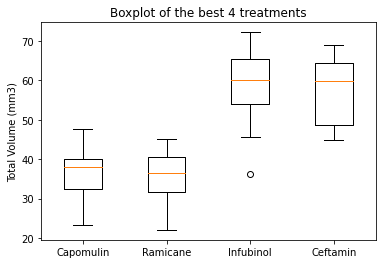

In [16]:
volumes = top4_df["Tumor Volumes"]
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of the best 4 treatments')
ax1.set_ylabel('Total Volume (mm3)')
ax1.boxplot(volumes)
plt.xticks(np.arange(len(promising_drugs))+1,promising_drugs)
plt.show()

In [17]:
volumes_list = pd.Series([val for sublist in top4_df["Tumor Volumes"] for val in sublist])
quartiles = volumes_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"""Conclusion: Since there are no values near the top or bottom outlier calculations, 
there are no observed outliers on the data""")

The lower quartile of temperatures is: 37.187743802499995
The upper quartile of temperatures is: 59.930261755000004
The interquartile range of temperatures is: 22.74251795250001
The the median of temperatures is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
Conclusion: Since there are no values near the top or bottom outlier calculations, 
there are no observed outliers on the data


## Line and Scatter Plots

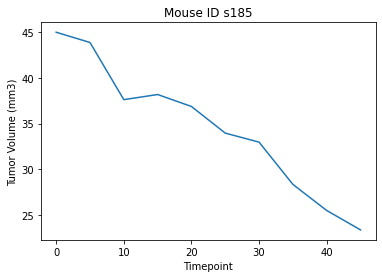

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = combined_data.loc[combined_data["Mouse ID"] == "s185"]
plt.plot(line_df["Timepoint"],line_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID s185")
plt.show()

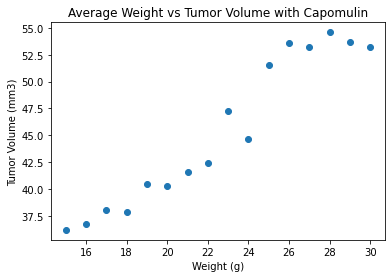

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
scatter = combined_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
scatter = scatter.reset_index()
plt.scatter(scatter["Weight (g)"],scatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Weight vs Tumor Volume with Capomulin")
plt.show()

## Correlation and Regression

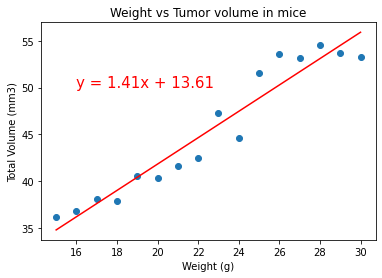

The correlation is (0.9625791810018307, 2.495430143084938e-09)


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter["Weight (g)"]
y_values = scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Total Volume (mm3)')
plt.title ("Weight vs Tumor volume in mice")
plt.show()
correlation = st.pearsonr(scatter["Weight (g)"],scatter["Tumor Volume (mm3)"])
print(f"The correlation is {correlation}")